In [18]:
using Plots

function cantor(p, q, n, fig, w)
    # plot if level n is zero
    if iszero(n)
        plot!(fig, [p[1], q[1]], [p[2], q[2]], c=:black, w=w, lab="")
    else
        # otherwise recurse into the first third ...
        cantor(p, p + (q-p) / 3.0, n-1, fig, w)
        # and into the last third
        cantor(p + 2(q-p) / 3.0, q, n-1, fig, w)
    end
    return nothing
end

cantor (generic function with 1 method)

In [19]:
function visualizecantor(k::Int)
    p = plot(size = (720, 180))
    k == 0 && return nothing
    w = Int(trunc(72/k))
    for i in 0:k
        cantor([0,1-i/k],[1,1-i/k],i,p,w)
    end
    p
end

visualizecantor (generic function with 1 method)

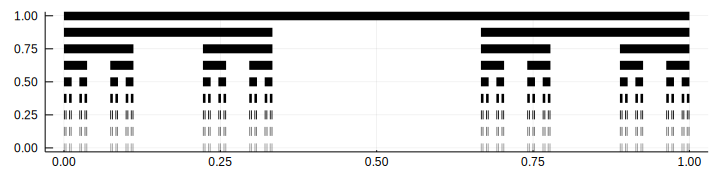

In [20]:
visualizecantor(8) |> plot

In [21]:
using StatsPlots, Distributions
using AverageShiftedHistograms
using Random

In [22]:
function gif_distribution(str::String, k::Int = 4)
    
    name = uppercase(str[1]) * lowercase(str[2:end])
    # normalize(str, casefold=true)
    
    (randfunc, statfunc, xrng, ylims) =
        (name == "Uniform") ? (rand,  ([0,1], [1,1]), 0:0.01:1,  [0,3]) :
        (name == "Normal")  ? (randn, Normal(0,1),    -5:0.05:5, [0,1]) :
        #(name == "Chi squared")  ? (randn, Chisq(1),  0:0.05:5,  [0,1]) :
        (name == "Exponential")  ? (randexp, Exponential(1),  0:0.05:10,  [0,1.5]) :
        nothing
    
    y = randfunc(2^k)
    o = ash(y; rng = xrng)
    xy(o)  # return (rng, density)

    anim = @animate for i = k:19
        ash!(o, randfunc(2^i))
        plot(
            o,
            ylims = ylims,
            title = "Anzahl der Beobachtungen: 2^" * string(i+1), 
            titlefonthalign = :left,
            palette = [RGBA(0,0,0,0.8), RGBA(0,0,0,0.5)],
        )
        plot!(
            statfunc,
            c = :blue,
            label = name * " Distribution"
        )
    end

    gif(anim, name * ".gif", fps = 5)
    
end

gif_distribution (generic function with 2 methods)

┌ Info: Saved animation to 
│   fn = /Users/zhouyuanheng/Julia/Uniform.gif
└ @ Plots /Users/zhouyuanheng/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/zhouyuanheng/Julia/Uniform.gif")
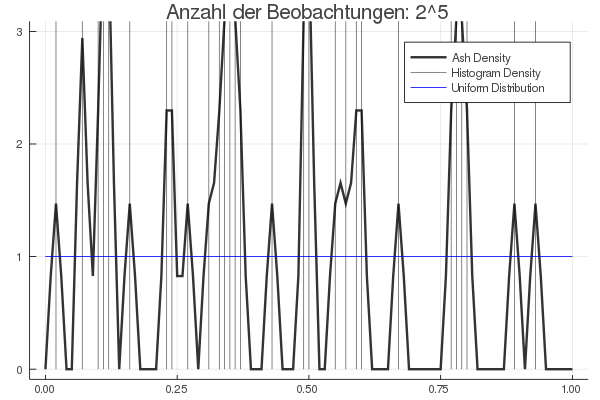

In [23]:
gif_distribution("uniform")

┌ Info: Saved animation to 
│   fn = /Users/zhouyuanheng/Julia/Normal.gif
└ @ Plots /Users/zhouyuanheng/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/zhouyuanheng/Julia/Normal.gif")
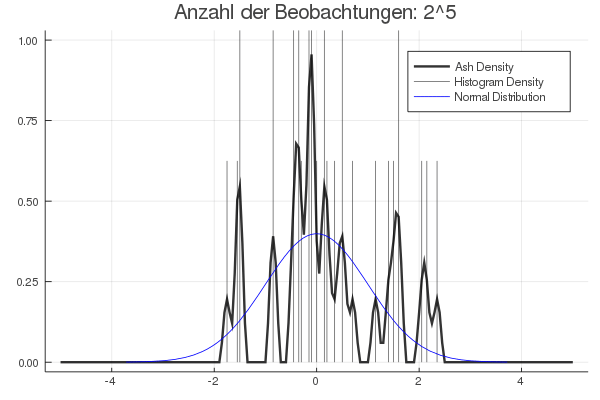

In [24]:
gif_distribution("nOrMaL")

┌ Info: Saved animation to 
│   fn = /Users/zhouyuanheng/Julia/Exponential.gif
└ @ Plots /Users/zhouyuanheng/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/zhouyuanheng/Julia/Exponential.gif")
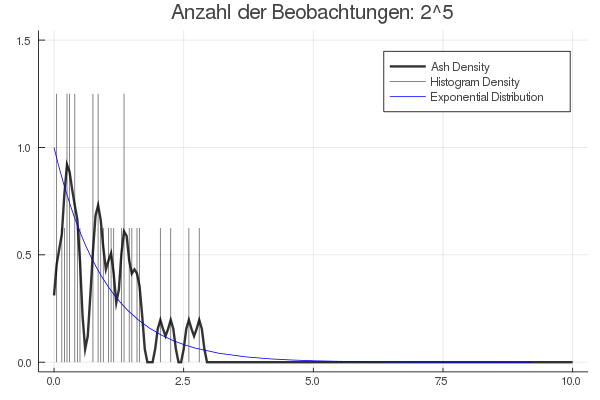

In [25]:
gif_distribution("exponential")

┌ Info: Saved animation to 
│   fn = /Users/zhouyuanheng/Julia/empirical_distributions.gif
└ @ Plots /Users/zhouyuanheng/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/zhouyuanheng/Julia/empirical_distributions.gif")
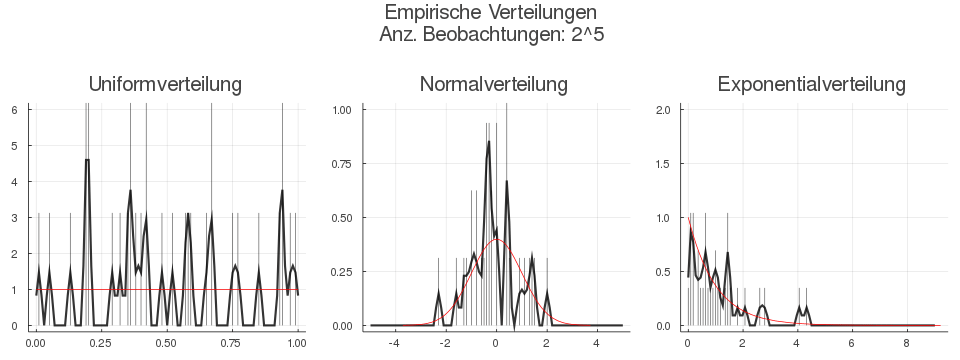

In [26]:
k = 4

plottitle(pow2::Int) = plot(
    title = "Empirische Verteilungen" * "\n" * "Anz. Beobachtungen: 2^" * string(pow2),
    grid = false, showaxis = false, bottom_margin = -0Plots.px
)
name = ["Uniform", "Normal", "Exponential"]
randfunc = [rand, randn, randexp]
statfunc = [([0,1], [1,1]), Normal(0,1), Exponential(1)]
xrng = [0:0.01:1, -5:0.1:5, 0:0.09:9]
ylims = [[0,6], [0,1], [0,2]]

o = [ash(randfunc[i](2^k); rng = xrng[i]) for i in 1:3]

p = Array{Plots.Plot}(undef, 3)

anim = @animate for j = k:19
    for i in 1:3
        ash!(o[i], randfunc[i](2^j))
        p[i] = plot(
            o[i],
            ylims = ylims[i],
            title = name[i] * "verteilung",
            legend = false,
            palette = [RGBA(0,0,0,0.8), RGBA(0,0,0,0.5)]
        )
        plot!(
            p[i],
            statfunc[i],
            c = :red,
            w = 1
        )
    end
    plot(plottitle(j+1), p[1], p[2], p[3],
        layout = @layout([A{0.01h}; [B C D]]), size = (960, 360))
end

gif(anim, "empirical_distributions.gif", fps = 5)

In [27]:
#=
# SOME UNFINISHED CODE

anim = @animate for i = k:19
    plot(
        Binomial()
        #title = "Anzahl der Beobachtungen: 2^" * string(i+1), 
        #titlefonthalign = :left,
        #palette = [RGBA(0,0,0,0.8), RGBA(0,0,0,0.5)],
    )
    plot!(
        Normal(0,1),
        c = :blue,
        label = name * " Distribution"
    )
end
gif(anim, "central_limit_theorem.gif", fps = 5)

=#

┌ Info: Saved animation to 
│   fn = /Users/zhouyuanheng/Julia/fourier_series.gif
└ @ Plots /Users/zhouyuanheng/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/zhouyuanheng/Julia/fourier_series.gif")
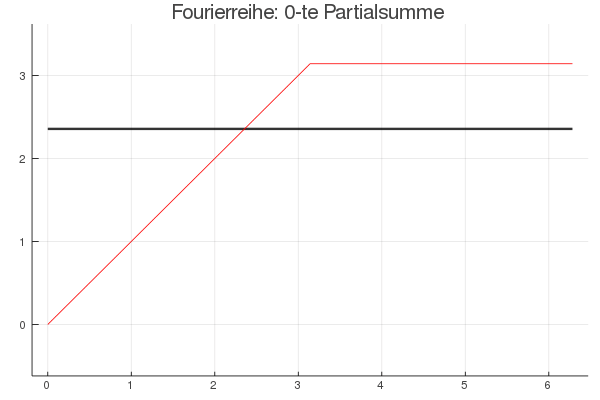

In [28]:
using Plots

f(m, x) = -sin(m*x)/m - (iseven(m) ? 0 : 2 * cos(m*x) / (π * m^2))
y₀ = 3π/4

x = range(0,2π,length=800)
y = fill(y₀, size(x))
plotfunc(m, fig) = plot!(fig, x, f.(m, x))

p = plot([0,π,2*π], [0,π,π], ylims=[-0.5,3.5])
anim = @animate for m in 0:100
    y .+= (m == 0 ? 0 : f.(m, x))
    plot(x, y, w=2, c=RGBA(0,0,0,0.8), title="Fourierreihe: "*string(m)*"-te Partialsumme", legend=false)
    plot!([0,π,2*π], [0,π,π], ylims=[-0.5,3.5], c=:red)
end
gif(anim, "fourier_series.gif", fps = 10)